# Описание данных

In [13]:
import numpy as np
import pandas as pd
import pickle
import os

- Главная директория для хранения всех данных по проекту -  **'/media/laggg/surviv_rl_data/'**
---
- Главная директория содержит как папки, так и .csv-файлы
- папка **'/media/laggg/surviv_rl_data/all_videoframes_gray/'** содержит все черно-белые кадры как обычного размера, так и 224х224
- папка **'/media/laggg/surviv_rl_data/all_videoframes_rgb/'** содержит все цветные кадры обычного размера
- папка **'/media/laggg/surviv_rl_data/all_videoframes_rgb_96/'** одержит все цветные кадры размера 96х96
- папка **'/media/laggg/surviv_rl_data/all_zips/'** содержит копии всех заархивированных данных
- папка **'/media/laggg/surviv_rl_data/creator_kit/'** содержит все основные текстуры разработчика на 2020г
- папка **'/media/laggg/surviv_rl_data/mp4s/'** содержит все 99 видеозаписей, скаченные с youtube
- папка **'/media/laggg/surviv_rl_data/pickles/'** содержит все метаданные о каждой видеозаписи
- папка **'/media/laggg/surviv_rl_data/PICTURES_numb/'** содержит примеры каждой из 10 цифр, всегдо 339 примеров

- .csv-файлы из главной директории **'/media/laggg/surviv_rl_data/'** содержат в себе информацию о направлении движения, о курсоре, и о состоянии инвентаря на каждом кадре.
---
- файл **'/media/laggg/surviv_rl_data/dataset_for_cursor_v1.csv/'** содержит данные о курсоре на следующем кадре относительно текущего (куда игрок переместит курсор в след. момент времени). **v1** - так как данные очень "грязные" - для одних кадров таргет курсора верный, для остальных - нет. Можно чистить следующим образом: если координаты курсора плавно изменяются от кадра к кадру и не стоят на месте, тогда считаем таргет курсора верным для этого временного отрезка
- файл **'/media/laggg/surviv_rl_data/dataset_for_moving.csv/'** содержит данные о направлении передвижения с текущего кадра на следующий
- файл **'/media/laggg/surviv_rl_data/dataset_inventory_v2.csv/'** содержит информацию о состоянии инвентаря игрока на каждом кадре. **v2** - так как этот датасет является очищенным от шумов (но не идельно). Можно еще улучшать с помощью более хорошего распознавания чисел и дополнительных операций пост-процессинга.
- файл **'/media/laggg/surviv_rl_data/dict_video2author.pickle/'** содержит словать с дополнительный метаинформацией о авторах каналов, с которых были взяты видеозаписи (нужно для построения альтернативной валидации)
- файл **'/media/laggg/surviv_rl_data/lm_loot_rewards.csv/'** содержит информацию для экспериментов по обучению агента через RL, где наградой является лутание одного из 4х объектов: бинты, аптечка, сода, таблетки

In [17]:
all_folders = os.listdir('/media/laggg/surviv_rl_data/')
all_folders

['creator_kit',
 'all_videoframes_rgb_84',
 'PICTURES_numb',
 'pickles',
 'dict_video2author.pickle',
 'all_videoframes_rgb',
 'dataset_inventory_v2.csv',
 'all_zips',
 'dataset_for_moving.csv',
 'all_videoframes_gray',
 'dataset_for_cursor_v1.csv',
 'mp4s',
 'lm_loot_rewards.csv']

## Примеры подгрузки кадров в RAM

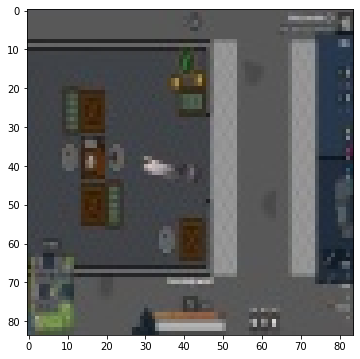

In [69]:
import matplotlib.pyplot as plt
import cv2

def see_plot(pict, size=(6,6)):
    plt.figure(figsize=size)
    plt.imshow(pict,cmap='gray') #, cmap=color, color='gray'
    #plt.grid()
    plt.show()

def load_image(video, frame):
    path = '/media/laggg/surviv_rl_data/all_videoframes_rgb_84/{}/'.format(video)
    p = cv2.imread(path + 'f_{}.jpg'.format(frame))
    return p[:,:,::-1]

p = load_image('ERDmPJ_0QJc&t', 1500)
see_plot(p1)

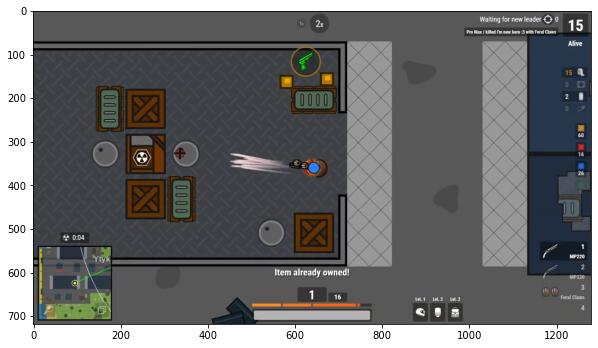

In [73]:
p = cv2.imread('/media/laggg/surviv_rl_data/all_videoframes_rgb/ERDmPJ_0QJc&t/f_1500.jpg')[:,:,::-1]
see_plot(p, (10,10))

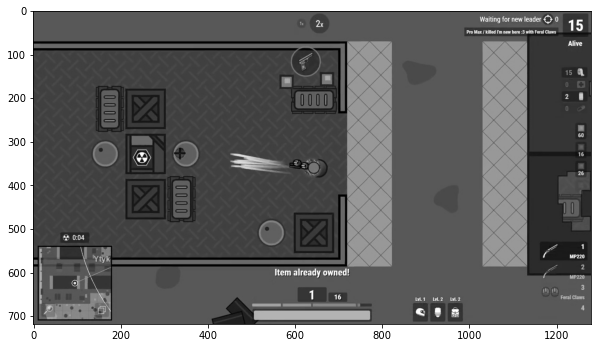

In [78]:
p = cv2.imread('/media/laggg/surviv_rl_data/all_videoframes_gray/ERDmPJ_0QJc&t/frames/f_1500.jpg')
see_plot(p, (10,10))

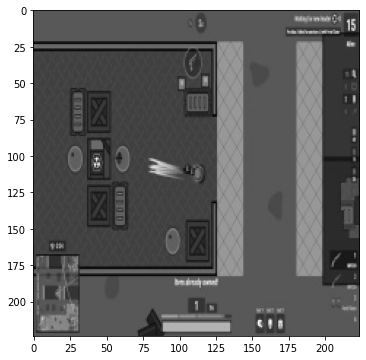

In [79]:
p = cv2.imread('/media/laggg/surviv_rl_data/all_videoframes_gray/ERDmPJ_0QJc&t/frames_224/f_1500.jpg')
see_plot(p)

## Примеры подгрузки в RAM csv-файлов

In [26]:
df = pd.read_csv('/media/laggg/surviv_rl_data/dataset_for_cursor_v1.csv')
print(df.shape)
# top-left and bottom-right x/y
df.head()

(1269976, 6)


,video,frame,tl_x,tl_y,br_x,br_y
0,RU2h8oKpuZA,0,575,261,620,301
1,RU2h8oKpuZA,1,575,262,620,302
2,RU2h8oKpuZA,2,575,262,620,302
3,RU2h8oKpuZA,3,576,264,621,304
4,RU2h8oKpuZA,4,580,266,625,306


In [27]:
df = pd.read_csv('/media/laggg/surviv_rl_data/dataset_for_moving.csv')
print(df.shape)
df.head()

(1269976, 3)


,video,frame,target
0,1YFx0LBYnKA,0,0
1,1YFx0LBYnKA,1,0
2,1YFx0LBYnKA,2,6
3,1YFx0LBYnKA,3,6
4,1YFx0LBYnKA,4,6


In [30]:
dg = pd.read_csv('/media/laggg/surviv_rl_data/dataset_inventory_v2.csv')
print(dg.shape)
dg.sample(5).T

(1269976, 23)


,1213180,1267352,733615,448443,549533
video,z2qbWqYCEFA,lDmzLBi_x4M,7wGmR6YDQeU,OguNtbvQf1I,rBml2YP503c
frame0,0,0,85,19,0
frame,2490,14371,386,790,9252
hp,87.55,71.96,100.0,100.0,100.0
sp,0.0,45.40505,0.0,0.127233,0.0
weapon_mag,0,0,0,0,0
bandage,5,9,0,5,0
medicine,0,0,0,0,0
cola,0,6,0,0,0
pills,0,3,0,0,0


In [46]:
d = pickle.load(open('/media/laggg/surviv_rl_data/dict_video2author.pickle', "rb"))
#print(d)

values = np.array(list(d.values()))
a,b = np.unique(values, return_counts=True)
dct = dict(zip(a,b))
dct = {k: v for k, v in sorted(dct.items(), key=lambda item: -item[1])}

dct

{'MkHero': 28,
 '-': 19,
 'TheAmazinDot': 14,
 'sv-98gaming': 7,
 'NumbatPlay': 5,
 'Lex': 4,
 'OdinakaJesus': 4,
 'Zatty': 4,
 'Siper': 3,
 'GAMERIO': 2,
 'Testy': 2,
 'IHASPROS': 1,
 'Verdz': 1,
 'desmos': 1,
 'iHASYOU': 1,
 'silverdotware': 1,
 'survivSerin': 1,
 'tankaltyYT': 1}

### Пример создания датасета для обучения передвижению:

- подгружаем столбец по пережвижению (правильно сопоставив каждому кадру его направление движения)
- \+ дополнительно подгружаем столбец 'mode' из метаданных о видео (1 - соло режим, 0 - дуо/трио/сквад режим )


In [53]:
df = pd.read_csv('/media/laggg/surviv_rl_data/dataset_for_moving.csv')
dg = pd.read_csv('/media/laggg/surviv_rl_data/dataset_inventory_v2.csv')
m = []
d = []
for i in range(len(os.listdir('/media/laggg/surviv_rl_data/pickles'))):
    x = os.listdir('/media/laggg/surviv_rl_data/pickles')[i]
    name = x.split('.pi')[0]
    new_d = pickle.load(open("/media/laggg/surviv_rl_data/pickles/{}.pickle".format(name), "rb"))
    m.extend([new_d['mode']]*len(dg[dg.video == name]))
    d.extend(df[df.video == name].target.values.tolist())
dg['mode'] = np.array(m).astype(np.uint8)
dg['dir'] = np.array(d).astype(np.uint8)
dg = dg[dg['dir'] != 0] # убираем все кадры, где игрок стоит на месте (направление 0)

print(dg.shape)
dg.head()

(1007275, 25)


,video,frame0,frame,hp,sp,weapon_mag,bandage,medicine,cola,pills,...,vest,backpack,zoom,use_band,use_medk,use_cola,use_pill,reloading,mode,dir
3,RU2h8oKpuZA,140,3,100.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,RU2h8oKpuZA,140,4,100.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
12,RU2h8oKpuZA,140,12,100.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
13,RU2h8oKpuZA,140,13,100.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
17,RU2h8oKpuZA,140,17,100.0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1


### Пример каноничного разделения данных на обучающую и валидационную выборку
- делим по видеозаписям

In [58]:
from sklearn.model_selection import train_test_split

#====================data split==============================================
videos = os.listdir('/media/laggg/surviv_rl_data/all_videoframes_gray/')
v_train, v_val = train_test_split(videos, test_size=0.1, random_state=42)

dg['train'] = dg['video'].apply(lambda x: 1 if x not in v_val else 0)
df_train = dg[dg['train'] == 1]
df_val = dg[dg['train'] == 0]
#============================================================================

print(dg.shape, df_train.shape, df_val.shape)
print('train:', np.unique(df_train['dir'], return_counts=True))
print('val:', np.unique(df_val['dir'], return_counts=True))
df_train.sample(3).T

(1007275, 26) (910423, 26) (96852, 26)
train: (array([1, 2, 3, 4, 5, 6, 7, 8], dtype=uint8), array([115934,  96577, 141013,  98032, 115612, 104709, 139067,  99479]))
val: (array([1, 2, 3, 4, 5, 6, 7, 8], dtype=uint8), array([13250, 10785, 15517,  9819, 11770, 10280, 14523, 10908]))


,1260231,899791,889498
video,lDmzLBi_x4M,06NHOfD3aCo,HTud4kKF1hk
frame0,0,0,3000
frame,7250,9069,17600
hp,74.62,100.0,97.06
sp,47.27395,77.83317,77.6
weapon_mag,1,0,0
bandage,0,5,15
medicine,0,1,2
cola,0,3,1
pills,0,0,0


## Метаданные о каждом видосе

- пикл c метаданными (инструкция по разметке тут https://github.com/Laggg/surviv.io-rl-bots-demo/blob/master/for_layout/example_of_making_layout.ipynb)
- \+ video2autor

In [81]:
new_d = pickle.load(open("/media/laggg/surviv_rl_data/pickles/FzAoSXZLS4s.pickle", "rb"))
new_d

{'link': 'FzAoSXZLS4s',
 'mode': 1,
 'lang': 'russia',
 'start': 882,
 'hp': (697, 700, 510, 771),
 'sp': (675, 678, 510, 771),
 'bandage': (172, 200, 1215, 1243),
 'medicine': (200, 228, 1215, 1243),
 'cola': (229, 257, 1215, 1243),
 'pills': (257, 285, 1215, 1243),
 'yellow': (300, 328, 1215, 1243),
 'red': (330, 358, 1215, 1243),
 'blue': (355, 383, 1215, 1243),
 'green': (380, 408, 1215, 1243),
 'helmet': (650, 678, 920, 948),
 'vest': (650, 678, 960, 988),
 'backpack': (650, 678, 1000, 1028),
 'right_bullets': (645, 673, 685, 713),
 'left_bullets': (640, 668, 610, 670),
 'all_kills': (545, 573, 575, 603),
 'zoom': (15, 43, 600, 810),
 'door': (400, 430, 670, 732),
 'action': (287, 310, 635, 720),
 'aw1': (530, 550, 1255, 1270),
 'aw2': (575, 600, 1255, 1270),
 'aw3': (625, 650, 1255, 1270),
 'aw4': (675, 690, 1255, 1270),
 'w1': (550, 575, 1200, 1270),
 'w2': (600, 625, 1200, 1270),
 'w3': (650, 675, 1200, 1270),
 'w4': (700, 717, 1200, 1270),
 'cursor': (549, 568, 435, 453, 5000)